# Projet 6 - Analysez les ventes d'une librairie avec Python #

## 1 - Librairies et fonctions

### *1.1 - Importation des librairies*

In [1]:
# Importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns

### *1.2 - Déclaration des fonctions*

In [2]:
# déclaration d'une fonction
def analyseDataFrame(df):
    """Fonction qui prend en arguments un dataframe pour analyse."""

    name =[x for x in globals() if globals()[x] is df][0]
    print("La dimension de DataFrame « " + name  +" » : " + str(df.shape) + " (lignes, colonnes)\n")
    display(temp_var = df.info())
    display(df.describe().T)
    display(df.head(5))
    
    # Afficher les colonnes qui sont unique dans le DataFrame df
    print("Test d'unicité sur les colonnes de DataFrame :")
    test_unicite = 0
    for col in df.columns :
        if df[col].size == df.drop_duplicates(col)[col].size :
          display(f'« {col:s} » est unique, et pourrait être une clé primaire.')
          test_unicite = 1
    if test_unicite == 0 :
        print("Il n'y a pas d'unicité dans aucune colonne. Il n'y a pas de clé primaire")

    print("Compter les nulles pour chaque colonne :")
    display(df.isnull().sum())
    
    print("Compter les duplicates:")
    display(df.duplicated().sum())

## 2 - Importer les fichiers et initialiser les Dataframes

### *2.1 - Importation et traitement des données*
           - df_customers 
           - df_products
           - df_transactions

In [3]:
# Importation des données au format csv
df_customers = pd.read_csv('customers.csv')
df_products = pd.read_csv('products.csv')
df_transactions = pd.read_csv('transactions.csv')

### df_transactions

In [4]:
# visualisation de df_transactions
analyseDataFrame(df_transactions)

La dimension de DataFrame « df_transactions » : (679532, 4) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


,count,unique,top,freq
id_prod,679532,3267,1_369,2252
date,679532,679371,test_2021-03-01 02:30:02.237413,13
session_id,679532,342316,s_0,200
client_id,679532,8602,c_1609,25488


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


Test d'unicité sur les colonnes de DataFrame :
Il n'y a pas d'unicité dans aucune colonne. Il n'y a pas de clé primaire
Compter les nulles pour chaque colonne :


id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

Compter les duplicates:


126

In [5]:
# description des doublons
df_transactions[df_transactions.duplicated()].describe()

,id_prod,date,session_id,client_id
count,126,126,126,126
unique,1,36,1,2
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
freq,126,11,126,69


In [6]:
# Visualiisation des doublons trier par la colonne client_id
df_transactions[df_transactions.duplicated()].sort_values(by='client_id')

,id_prod,date,session_id,client_id
425213,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_0
401739,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
394969,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
380103,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_0
379783,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
...,...,...,...,...
311604,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_1
309348,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
295782,T_0,test_2021-03-01 02:30:02.237418,s_0,ct_1
345150,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_1


In [7]:
# visualisation de la valeurs 'T_0' de la colonne id_prod
df_transactions[df_transactions['id_prod'] == 'T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [8]:
# création de dataFrame sans les valeur 'T_0, ct_0 et ct_1'
df_transactions = df_transactions[df_transactions['id_prod'] != 'T_0']

df_transactions =(df_transactions[ (df_transactions['client_id']!='ct_0') & (df_transactions['client_id']!='ct_1') ])

# visualisation de df_transactions
analyseDataFrame(df_transactions)

La dimension de DataFrame « df_transactions » : (679332, 4) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


,count,unique,top,freq
id_prod,679332,3266,1_369,2252
date,679332,679332,2022-05-20 13:21:29.043970,1
session_id,679332,342315,s_118668,14
client_id,679332,8600,c_1609,25488


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


Test d'unicité sur les colonnes de DataFrame :


'« date » est unique, et pourrait être une clé primaire.'

Compter les nulles pour chaque colonne :


id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

Compter les duplicates:


0

### df_customers

In [9]:
# visualisation de df_customers
analyseDataFrame(df_customers)

La dimension de DataFrame « df_customers » : (8623, 3) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


,count,mean,std,min,25%,50%,75%,max
birth,8623.0,1978.280877,16.919535,1929.0,1966.0,1979.0,1992.0,2004.0


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


Test d'unicité sur les colonnes de DataFrame :


'« client_id » est unique, et pourrait être une clé primaire.'

Compter les nulles pour chaque colonne :


client_id    0
sex          0
birth        0
dtype: int64

Compter les duplicates:


0

In [10]:
# vérification de la colonne client_id
df_customers[df_customers['client_id']== 'ct_0'] 

,client_id,sex,birth
2735,ct_0,f,2001


In [11]:
# vérification de la colonne client_id
df_customers[df_customers['client_id']== 'ct_1'] 

,client_id,sex,birth
8494,ct_1,m,2001


In [12]:
# suppression de la valeurs 'ct_0' de la colonne client_id
df_customers.drop(df_customers[df_customers['client_id']=='ct_0'].index, inplace=True)

In [13]:
# suppression de la valeurs 'ct_1' de la colonne client_id
df_customers.drop(df_customers[df_customers['client_id']=='ct_1'].index, inplace=True)

In [14]:
# création d'une colonne age
df_customers['age'] =  2022 - df_customers.birth
df_customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


### df_products

In [15]:
# visualisation de df_products
analyseDataFrame(df_products)

La dimension de DataFrame « df_products » : (3287, 3) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


,count,mean,std,min,25%,50%,75%,max
price,3287.0,21.856641,29.847908,-1.0,6.99,13.06,22.99,300.0
categ,3287.0,0.370246,0.615387,0.0,0.00,0.00,1.00,2.0


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


Test d'unicité sur les colonnes de DataFrame :


'« id_prod » est unique, et pourrait être une clé primaire.'

Compter les nulles pour chaque colonne :


id_prod    0
price      0
categ      0
dtype: int64

Compter les duplicates:


0

In [16]:
# vérification de la colonne id_prod
df_products[df_products['id_prod']== 'T_0']

,id_prod,price,categ
731,T_0,-1.0,0


In [17]:
# visualisation de la valeur aberrante '-1'
df_products[df_products['price'] == -1] 

,id_prod,price,categ
731,T_0,-1.0,0


In [18]:
# suppression de la valeur 'T_0' et de la valeurs aberrante '-1'
df_products.drop(df_products[df_products['id_prod']=='T_0'].index, inplace=True)

analyseDataFrame(df_products)

La dimension de DataFrame « df_products » : (3286, 3) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 102.7+ KB


,count,mean,std,min,25%,50%,75%,max
price,3286.0,21.863597,29.849786,0.62,6.99,13.075,22.99,300.0
categ,3286.0,0.370359,0.615446,0.00,0.00,0.000,1.00,2.0


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


Test d'unicité sur les colonnes de DataFrame :


'« id_prod » est unique, et pourrait être une clé primaire.'

Compter les nulles pour chaque colonne :


id_prod    0
price      0
categ      0
dtype: int64

Compter les duplicates:


0

In [19]:
# Création d'une  jointure externe avec indicateur des données présentent
merge_1 = pd.merge(df_customers, df_transactions,
                   on = 'client_id', how = 'outer', indicator = True)

analyseDataFrame(merge_1)

La dimension de DataFrame « merge_1 » : (679353, 8) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679353 entries, 0 to 679352
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   client_id   679353 non-null  object  
 1   sex         679353 non-null  object  
 2   birth       679353 non-null  int64   
 3   age         679353 non-null  int64   
 4   id_prod     679332 non-null  object  
 5   date        679332 non-null  object  
 6   session_id  679332 non-null  object  
 7   _merge      679353 non-null  category
dtypes: category(1), int64(2), object(5)
memory usage: 42.1+ MB


,count,mean,std,min,25%,50%,75%,max
birth,679353.0,1977.811343,13.574821,1929.0,1970.0,1980.0,1987.0,2004.0
age,679353.0,44.188657,13.574821,18.0,35.0,42.0,52.0,93.0


,client_id,sex,birth,age,id_prod,date,session_id,_merge
0,c_4410,f,1967,55,0_1316,2021-12-29 09:11:18.860592,s_141762,both
1,c_4410,f,1967,55,1_385,2021-03-22 01:40:22.782925,s_9707,both
2,c_4410,f,1967,55,1_190,2021-11-12 18:11:43.280574,s_118628,both
3,c_4410,f,1967,55,0_1455,2021-03-22 14:29:25.189266,s_9942,both
4,c_4410,f,1967,55,1_483,2022-03-13 21:35:55.949042,s_178686,both


Test d'unicité sur les colonnes de DataFrame :
Il n'y a pas d'unicité dans aucune colonne. Il n'y a pas de clé primaire
Compter les nulles pour chaque colonne :


client_id      0
sex            0
birth          0
age            0
id_prod       21
date          21
session_id    21
_merge         0
dtype: int64

Compter les duplicates:


0

In [20]:
# visualisation des nulles
merge_1[merge_1.id_prod.isnull()]

,client_id,sex,birth,age,id_prod,date,session_id,_merge
59493,c_8253,f,2001,21,NaN,NaN,NaN,left_only
200286,c_3789,f,1997,25,NaN,NaN,NaN,left_only
218173,c_4406,f,1998,24,NaN,NaN,NaN,left_only
220388,c_2706,f,1967,55,NaN,NaN,NaN,left_only
225538,c_3443,m,1959,63,NaN,NaN,NaN,left_only
248409,c_4447,m,1956,66,NaN,NaN,NaN,left_only
248965,c_3017,f,1992,30,NaN,NaN,NaN,left_only
261024,c_4086,f,1992,30,NaN,NaN,NaN,left_only
313133,c_6930,m,2004,18,NaN,NaN,NaN,left_only
319727,c_4358,m,1999,23,NaN,NaN,NaN,left_only


In [21]:
# description de la colonne _merge
merge_1._merge.describe()

count     679353
unique         2
top         both
freq      679332
Name: _merge, dtype: object

In [22]:
# visulation des données fusionnées
merge_1[merge_1['_merge'] != 'both']  

,client_id,sex,birth,age,id_prod,date,session_id,_merge
59493,c_8253,f,2001,21,NaN,NaN,NaN,left_only
200286,c_3789,f,1997,25,NaN,NaN,NaN,left_only
218173,c_4406,f,1998,24,NaN,NaN,NaN,left_only
220388,c_2706,f,1967,55,NaN,NaN,NaN,left_only
225538,c_3443,m,1959,63,NaN,NaN,NaN,left_only
248409,c_4447,m,1956,66,NaN,NaN,NaN,left_only
248965,c_3017,f,1992,30,NaN,NaN,NaN,left_only
261024,c_4086,f,1992,30,NaN,NaN,NaN,left_only
313133,c_6930,m,2004,18,NaN,NaN,NaN,left_only
319727,c_4358,m,1999,23,NaN,NaN,NaN,left_only


In [23]:
# création d'un dataframe contenant uniquement les valeurs 'both' de la colonne _merge
merge_1_both = merge_1[merge_1['_merge'] == 'both']

# visualisation de df_transactions_clients_both
analyseDataFrame(merge_1_both)

La dimension de DataFrame « merge_1_both » : (679332, 8) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679352
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   client_id   679332 non-null  object  
 1   sex         679332 non-null  object  
 2   birth       679332 non-null  int64   
 3   age         679332 non-null  int64   
 4   id_prod     679332 non-null  object  
 5   date        679332 non-null  object  
 6   session_id  679332 non-null  object  
 7   _merge      679332 non-null  category
dtypes: category(1), int64(2), object(5)
memory usage: 42.1+ MB


,count,mean,std,min,25%,50%,75%,max
birth,679332.0,1977.811139,13.574553,1929.0,1970.0,1980.0,1987.0,2004.0
age,679332.0,44.188861,13.574553,18.0,35.0,42.0,52.0,93.0


,client_id,sex,birth,age,id_prod,date,session_id,_merge
0,c_4410,f,1967,55,0_1316,2021-12-29 09:11:18.860592,s_141762,both
1,c_4410,f,1967,55,1_385,2021-03-22 01:40:22.782925,s_9707,both
2,c_4410,f,1967,55,1_190,2021-11-12 18:11:43.280574,s_118628,both
3,c_4410,f,1967,55,0_1455,2021-03-22 14:29:25.189266,s_9942,both
4,c_4410,f,1967,55,1_483,2022-03-13 21:35:55.949042,s_178686,both


Test d'unicité sur les colonnes de DataFrame :


'« date » est unique, et pourrait être une clé primaire.'

Compter les nulles pour chaque colonne :


client_id     0
sex           0
birth         0
age           0
id_prod       0
date          0
session_id    0
_merge        0
dtype: int64

Compter les duplicates:


0

In [24]:
# description de la colonne '_merge'
merge_1_both._merge.describe()

count     679332
unique         1
top         both
freq      679332
Name: _merge, dtype: object

In [25]:
# supression de la colonne '_merge'
merge_1_both = merge_1_both.drop(['_merge'], axis = 1)

In [26]:
# création d'un second dataframe contenant uniquement les valeurs 'both' de la colonne _merge
merge_2 = pd.merge(merge_1_both, df_products,
                  on = 'id_prod', how = 'outer', indicator = True)

# visualisation de merge_2
analyseDataFrame(merge_2)

La dimension de DataFrame « merge_2 » : (679353, 10) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679353 entries, 0 to 679352
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   client_id   679332 non-null  object  
 1   sex         679332 non-null  object  
 2   birth       679332 non-null  float64 
 3   age         679332 non-null  float64 
 4   id_prod     679353 non-null  object  
 5   date        679332 non-null  object  
 6   session_id  679332 non-null  object  
 7   price       679132 non-null  float64 
 8   categ       679132 non-null  float64 
 9   _merge      679353 non-null  category
dtypes: category(1), float64(4), object(5)
memory usage: 52.5+ MB


,count,mean,std,min,25%,50%,75%,max
birth,679332.0,1977.811139,13.574553,1929.00,1970.00,1980.00,1987.00,2004.0
age,679332.0,44.188861,13.574553,18.00,35.00,42.00,52.00,93.0
price,679132.0,17.455405,18.331641,0.62,8.87,13.99,18.99,300.0
categ,679132.0,0.441951,0.595046,0.00,0.00,0.00,1.00,2.0


,client_id,sex,birth,age,id_prod,date,session_id,price,categ,_merge
0,c_4410,f,1967.0,55.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.2,0.0,both
1,c_4410,f,1967.0,55.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.2,0.0,both
2,c_4410,f,1967.0,55.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.2,0.0,both
3,c_3654,f,1978.0,44.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.2,0.0,both
4,c_3654,f,1978.0,44.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.2,0.0,both


Test d'unicité sur les colonnes de DataFrame :
Il n'y a pas d'unicité dans aucune colonne. Il n'y a pas de clé primaire
Compter les nulles pour chaque colonne :


client_id      21
sex            21
birth          21
age            21
id_prod         0
date           21
session_id     21
price         221
categ         221
_merge          0
dtype: int64

Compter les duplicates:


0

In [27]:
# description de la colonne '_merge'
merge_2._merge.describe()

count     679353
unique         3
top         both
freq      679111
Name: _merge, dtype: object

In [28]:
# visualisation des nulles de la colonne 'client_id'
merge_2[merge_2.client_id.isnull()]

,client_id,sex,birth,age,id_prod,date,session_id,price,categ,_merge
679332,NaN,NaN,NaN,NaN,0_1016,NaN,NaN,35.06,0.0,right_only
679333,NaN,NaN,NaN,NaN,0_1780,NaN,NaN,1.67,0.0,right_only
679334,NaN,NaN,NaN,NaN,0_1062,NaN,NaN,20.08,0.0,right_only
679335,NaN,NaN,NaN,NaN,0_1119,NaN,NaN,2.99,0.0,right_only
679336,NaN,NaN,NaN,NaN,0_1014,NaN,NaN,1.15,0.0,right_only
679337,NaN,NaN,NaN,NaN,1_0,NaN,NaN,31.82,1.0,right_only
679338,NaN,NaN,NaN,NaN,0_1318,NaN,NaN,20.92,0.0,right_only
679339,NaN,NaN,NaN,NaN,0_1800,NaN,NaN,22.05,0.0,right_only
679340,NaN,NaN,NaN,NaN,0_1645,NaN,NaN,2.99,0.0,right_only
679341,NaN,NaN,NaN,NaN,0_322,NaN,NaN,2.99,0.0,right_only


In [29]:
# visualisation des nulles de la colonne 'session_id'
merge_2[merge_2.session_id.isnull()]

,client_id,sex,birth,age,id_prod,date,session_id,price,categ,_merge
679332,NaN,NaN,NaN,NaN,0_1016,NaN,NaN,35.06,0.0,right_only
679333,NaN,NaN,NaN,NaN,0_1780,NaN,NaN,1.67,0.0,right_only
679334,NaN,NaN,NaN,NaN,0_1062,NaN,NaN,20.08,0.0,right_only
679335,NaN,NaN,NaN,NaN,0_1119,NaN,NaN,2.99,0.0,right_only
679336,NaN,NaN,NaN,NaN,0_1014,NaN,NaN,1.15,0.0,right_only
679337,NaN,NaN,NaN,NaN,1_0,NaN,NaN,31.82,1.0,right_only
679338,NaN,NaN,NaN,NaN,0_1318,NaN,NaN,20.92,0.0,right_only
679339,NaN,NaN,NaN,NaN,0_1800,NaN,NaN,22.05,0.0,right_only
679340,NaN,NaN,NaN,NaN,0_1645,NaN,NaN,2.99,0.0,right_only
679341,NaN,NaN,NaN,NaN,0_322,NaN,NaN,2.99,0.0,right_only


In [30]:
merge_2[merge_2['_merge'] != 'both']  

,client_id,sex,birth,age,id_prod,date,session_id,price,categ,_merge
542051,c_4505,m,1976.0,46.0,0_2245,2022-01-09 09:23:31.000720,s_147220,NaN,NaN,left_only
542052,c_4505,m,1976.0,46.0,0_2245,2022-11-09 09:23:31.000720,s_295013,NaN,NaN,left_only
542053,c_3468,f,1981.0,41.0,0_2245,2021-09-11 10:52:05.205583,s_88251,NaN,NaN,left_only
542054,c_3468,f,1981.0,41.0,0_2245,2022-05-11 10:52:05.205583,s_206902,NaN,NaN,left_only
542055,c_1403,f,1978.0,44.0,0_2245,2022-09-15 14:26:50.187952,s_268455,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...
679348,NaN,NaN,NaN,NaN,0_1624,NaN,NaN,24.50,0.0,right_only
679349,NaN,NaN,NaN,NaN,2_86,NaN,NaN,132.36,2.0,right_only
679350,NaN,NaN,NaN,NaN,0_299,NaN,NaN,22.99,0.0,right_only
679351,NaN,NaN,NaN,NaN,0_510,NaN,NaN,23.66,0.0,right_only


In [31]:
merge_2[merge_2['_merge'] != 'both'].shape

(242, 10)

<AxesSubplot:>

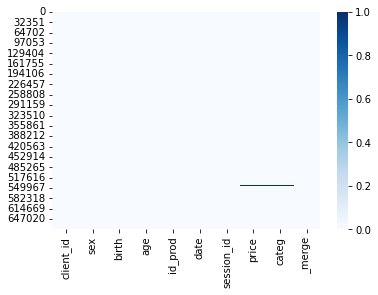

In [32]:
sns.heatmap(merge_2.isnull(), cmap='Blues')

### Il y a peu de valeurs manquantes par rapport au nombre de donnnées, à voir avec l'équipes pour leur traitement, en attendant je ne les conserve pas pour mon  analyse

In [33]:
# création du dataframe enrichi
df_enrichi = merge_2[merge_2['_merge'] == 'both']

# ajout d'une seconde colonne date
df_enrichi = df_enrichi.assign(date_2 = (df_enrichi.date)) 

# visualisation de df_enrichi
analyseDataFrame(df_enrichi)

La dimension de DataFrame « df_enrichi » : (679111, 11) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679331
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   client_id   679111 non-null  object  
 1   sex         679111 non-null  object  
 2   birth       679111 non-null  float64 
 3   age         679111 non-null  float64 
 4   id_prod     679111 non-null  object  
 5   date        679111 non-null  object  
 6   session_id  679111 non-null  object  
 7   price       679111 non-null  float64 
 8   categ       679111 non-null  float64 
 9   _merge      679111 non-null  category
 10  date_2      679111 non-null  object  
dtypes: category(1), float64(4), object(6)
memory usage: 57.6+ MB


,count,mean,std,min,25%,50%,75%,max
birth,679111.0,1977.811149,13.575361,1929.00,1970.00,1980.00,1987.00,2004.0
age,679111.0,44.188851,13.575361,18.00,35.00,42.00,52.00,93.0
price,679111.0,17.454773,18.328998,0.62,8.87,13.99,18.99,300.0
categ,679111.0,0.441953,0.595042,0.00,0.00,0.00,1.00,2.0


,client_id,sex,birth,age,id_prod,date,session_id,price,categ,_merge,date_2
0,c_4410,f,1967.0,55.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.2,0.0,both,2021-12-29 09:11:18.860592
1,c_4410,f,1967.0,55.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.2,0.0,both,2022-03-29 09:11:18.860592
2,c_4410,f,1967.0,55.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.2,0.0,both,2022-05-29 09:11:18.860592
3,c_3654,f,1978.0,44.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.2,0.0,both,2021-11-26 03:51:34.068872
4,c_3654,f,1978.0,44.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.2,0.0,both,2022-08-26 03:51:34.068872


Test d'unicité sur les colonnes de DataFrame :


'« date » est unique, et pourrait être une clé primaire.'

'« date_2 » est unique, et pourrait être une clé primaire.'

Compter les nulles pour chaque colonne :


client_id     0
sex           0
birth         0
age           0
id_prod       0
date          0
session_id    0
price         0
categ         0
_merge        0
date_2        0
dtype: int64

Compter les duplicates:


0

In [34]:
# écriture du dataFrame en format csv
df_enrichi.to_csv('df_enrichi.csv')